## Exploratory Data Analysis

In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 

### Loading Raw Data
Right away we notice that the dataset comes with 7 unique features. Of those 7 unique features, we will only be using 2 for the text classification model.

In [10]:
raw_data = pd.read_csv('../data/drugsComTest_raw.csv')
raw_data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


### Feature Selection

In [11]:
clf_data = pd.read_csv('../data/complete_project_data.csv', usecols=['rating','cleaned_review'])
clf_data.head()

,rating,cleaned_review
0,6,helps keep attention class seems make keep gri...
1,10,medicine amazing used always last one turn tes...
2,4,hyper focused dry mouth straterra put state ma...
3,8,adhd taking adderall years take morning someti...
4,9,keeps focused however wears sleep till hours l...


### Data Types

In [12]:
clf_data.dtypes

rating             int64
cleaned_review    object
dtype: object

### Checking For Any Null Values

In [13]:
print(clf_data.isnull().sum())

rating             0
cleaned_review    21
dtype: int64


In [14]:
null = clf_data.isnull().any(axis=1)
null_rows = clf_data[null]

print(null_rows.head())

       rating cleaned_review
11319       9            NaN
11342       9            NaN
14651       9            NaN
16147       8            NaN
18563       9            NaN


### Dropping Rows with Null Reviews

In [15]:
clf_data = clf_data.dropna()

### Five Number Summary for Ratings

In [16]:
rating_data = clf_data['rating']

rating_data.describe()

count    215010.000000
mean          6.989773
std           3.275658
min           1.000000
25%           5.000000
50%           8.000000
75%          10.000000
max          10.000000
Name: rating, dtype: float64

### Rating Value Counts

In [17]:
rating_data.value_counts()

10    67987
9     36694
1     28913
8     25039
7     12544
5     10722
2      9265
3      8718
6      8458
4      6670
Name: rating, dtype: int64

### Data Visualization

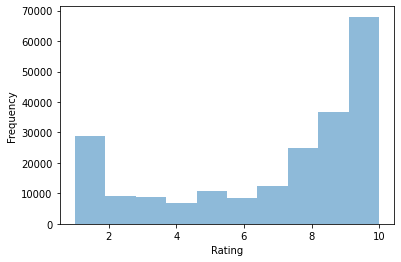

In [18]:
plt.hist(rating_data, alpha = 0.5, bins=10)
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.show()

### Text Classification Models without Sampling

In [19]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
%matplotlib inline 

### Linear SVM (Stochastic Gradient Descent) 

In [20]:
x = clf_data['cleaned_review']
y = clf_data['rating']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=0)

In [21]:
# Classification Pipeline
sgd_clf_pipeline = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, 
                                      random_state=42, max_iter=5, tol=None)),
               ])

In [22]:
# Fitting + Prediction
sgd_clf_pipeline.fit(x_train.values.astype('U'), y_train)
sgd_prediction = sgd_clf_pipeline.predict(x_test.values.astype('U'))

In [23]:
# Accuracy + Classification Report
print('===============Stochastic Gradient Descent===============')
print(classification_report(y_test, sgd_prediction))

===============Stochastic Gradient Descent===============
              precision    recall  f1-score   support

           1       0.49      0.65      0.56      8549
           2       0.19      0.09      0.13      2734
           3       0.23      0.12      0.16      2615
           4       0.19      0.15      0.17      1979
           5       0.26      0.13      0.17      3261
           6       0.22      0.12      0.15      2599
           7       0.24      0.14      0.17      3737
           8       0.33      0.13      0.18      7582
           9       0.31      0.13      0.19     11018
          10       0.49      0.86      0.62     20429

    accuracy                           0.43     64503
   macro avg       0.29      0.25      0.25     64503
weighted avg       0.37      0.43      0.37     64503



### Naive Bayes

In [24]:
# Bernoulli Naive Bayes Classifier
bern_clf = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', BernoulliNB()),
               ])

# Fitting + Prediction
bern_clf.fit(x_train.values.astype('U'),y_train)
bern_prediction = bern_clf.predict(x_test.values.astype('U'))

# Accuracy + Classification Report
print('================= Bernoulli Naive Bayes =================')
print(classification_report(y_test,bern_prediction))

================= Bernoulli Naive Bayes =================
              precision    recall  f1-score   support

           1       0.47      0.66      0.55      8549
           2       0.35      0.11      0.16      2734
           3       0.33      0.11      0.17      2615
           4       0.42      0.04      0.07      1979
           5       0.20      0.16      0.18      3261
           6       0.51      0.04      0.07      2599
           7       0.36      0.09      0.14      3737
           8       0.31      0.24      0.27      7582
           9       0.34      0.33      0.34     11018
          10       0.51      0.74      0.60     20429

    accuracy                           0.43     64503
   macro avg       0.38      0.25      0.26     64503
weighted avg       0.41      0.43      0.39     64503



### Text Classification Models with Sampling (With Replacement)

In [25]:
import random 
# Drawing a sample of 20,000 from each group

one_sample = clf_data.loc[clf_data['rating'] == 1]
two_sample = clf_data.loc[clf_data['rating'] == 2]
three_sample = clf_data.loc[clf_data['rating'] == 3]
four_sample = clf_data.loc[clf_data['rating'] == 4]
five_sample = clf_data.loc[clf_data['rating'] == 5]
six_sample = clf_data.loc[clf_data['rating'] == 6]
seven_sample = clf_data.loc[clf_data['rating'] == 7]
eight_sample = clf_data.loc[clf_data['rating'] == 8]
nine_sample = clf_data.loc[clf_data['rating'] == 9]
ten_sample = clf_data.loc[clf_data['rating'] == 10]

In [32]:
one_sample = one_sample.sample(n = 20_000, replace=True, random_state=1)
two_sample = two_sample.sample(n = 20_000, replace=True, random_state=1)
three_sample = three_sample.sample(n = 20_000, replace=True, random_state=1)
four_sample = four_sample.sample(n = 20_000, replace=True, random_state=1)
five_sample = five_sample.sample(n = 20_000, replace=True, random_state=1)
six_sample = six_sample.sample(n = 20_000, replace=True, random_state=1)
seven_sample = seven_sample.sample(n = 20_000, replace=True, random_state=1)
eight_sample = eight_sample.sample(n = 20_000, replace=True, random_state=1)
nine_sample = nine_sample.sample(n = 20_000, replace=True, random_state=1)
ten_sample = ten_sample.sample(n = 20_000, replace=True, random_state=1)

combined_sample = pd.concat([one_sample,two_sample,three_sample,
                             four_sample,five_sample,six_sample,
                             seven_sample,eight_sample,nine_sample,
                             ten_sample])

#### Linear SVM (Stochastic Gradient Descent) 

In [33]:
X = combined_sample['cleaned_review']
Y = combined_sample['rating']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.30, random_state=0)

In [34]:
# Classification Pipeline
sgd_clf_pipeline = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])

In [35]:
# Fitting + Prediction
sgd_clf_pipeline.fit(x_train.values.astype('U'), y_train)
sgd_prediction = sgd_clf_pipeline.predict(x_test.values.astype('U'))

In [36]:
# Accuracy + Classification Report
print('===============Stochastic Gradient Descent===============')
print(classification_report(y_test, sgd_prediction))

===============Stochastic Gradient Descent===============
              precision    recall  f1-score   support

           1       0.63      0.75      0.68      5945
           2       0.67      0.67      0.67      5940
           3       0.71      0.66      0.68      6019
           4       0.70      0.69      0.69      5997
           5       0.69      0.64      0.66      5946
           6       0.66      0.70      0.68      5980
           7       0.71      0.65      0.68      6069
           8       0.71      0.59      0.64      6051
           9       0.68      0.61      0.64      6058
          10       0.60      0.76      0.67      5995

    accuracy                           0.67     60000
   macro avg       0.67      0.67      0.67     60000
weighted avg       0.67      0.67      0.67     60000



#### Naive Bayes

In [37]:
# Bernoulli Naive Bayes Classifier
bern_clf = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', BernoulliNB()),
               ])

# Fitting + Prediction
bern_clf.fit(x_train.values.astype('U'),y_train)
bern_prediction = bern_clf.predict(x_test.values.astype('U'))

# Accuracy + Classification Report
print('================= Bernoulli Naive Bayes =================')
print(classification_report(y_test,bern_prediction))

================= Bernoulli Naive Bayes =================
              precision    recall  f1-score   support

           1       0.43      0.70      0.54      5945
           2       0.66      0.56      0.61      5940
           3       0.62      0.55      0.59      6019
           4       0.52      0.61      0.57      5997
           5       0.62      0.55      0.58      5946
           6       0.69      0.53      0.60      5980
           7       0.69      0.54      0.61      6069
           8       0.64      0.51      0.57      6051
           9       0.66      0.53      0.59      6058
          10       0.51      0.71      0.59      5995

    accuracy                           0.58     60000
   macro avg       0.60      0.58      0.58     60000
weighted avg       0.60      0.58      0.58     60000

